In [10]:

import cv2
import numpy as np

img1 = cv2.imread('covid_image.png') 
img2 = cv2.imread('mask.png')
 

dest_xor = cv2.bitwise_xor(img1, img2, mask = None)

cv2.imshow('Bitwise XOR', dest_xor)
cv2.imwrite("res_bitwise.jpg", dest_xor)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

In [12]:

img = cv2.imread('res_bitwise.jpg', 0)

m, n = img.shape
  
mask = np.ones([5, 5], dtype = int)
mask = mask / 9
  

img_new = np.zeros([m, n])
 
for i in range(1, m-1):
    for j in range(1, n-1):
        temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]
        
        img_new[i, j]= temp
         
img_new = img_new.astype(np.uint8)
cv2.imwrite('es_noise_removal.jpg', img_new)

True

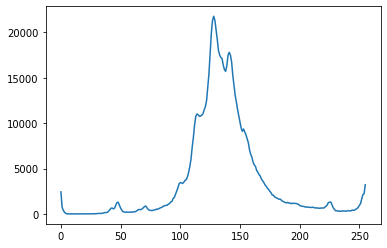

In [13]:
img = cv2.imread('es_noise_removal.jpg',0)
  
histr = cv2.calcHist([img],[0],None,[256],[0,256])

plt.plot(histr)
plt.show()

In [15]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('es_noise_removal.jpg',0)
equ = cv.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv.imwrite('res_contras.jpg',equ)

True

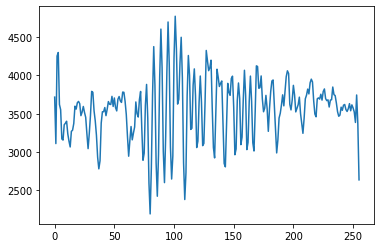

In [16]:
img = cv2.imread('res_contras.jpg',0)
  
# find frequency of pixels in range 0-255
histr = cv2.calcHist([img],[0],None,[256],[0,256])
  
# show the plotting graph of an image
plt.plot(histr)
plt.show()